<a href="https://colab.research.google.com/github/varun-beep/NLP_LAB/blob/main/Text_Analysis_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import re
import nltk
import spacy
import gensim
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize, TreebankWordTokenizer, TweetTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from string import punctuation
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer

In [7]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [9]:
text = "Football is a globally loved sport! Players train hard—sometimes, they don’t even rest. The most followed club competitions include UEFA Champions League, LaLiga & Premier League. Can a team succeed without teamwork? No! Coaches emphasize strategy, not just skills. Reach me at footballfan27@gmail.com for discussions. Call me at +1-555-1234 for more. A legendary footballer was born on 27-March-2000."

In [14]:
# Tokenization using multiple methods
tokens_nltk = word_tokenize(text)
tokens_sentences = sent_tokenize(text)
tokens_treebank = TreebankWordTokenizer().tokenize(text)
tokens_tweet = TweetTokenizer().tokenize(text)
tokens_textblob = TextBlob(text).words
tokens_spacy = [token.text for token in nlp(text)]
tokens_gensim = list(gensim.utils.simple_preprocess(text))
keras_tokenizer = Tokenizer()
keras_tokenizer.fit_on_texts([text])
tokens_keras = list(keras_tokenizer.word_index.keys())

In [15]:
# Unique Tokens Count
unique_tokens = set(tokens_nltk)
print(f"Unique Tokens Count: {len(unique_tokens)}")

Unique Tokens Count: 61


In [16]:
# Count and remove punctuation
punct_count = sum(1 for char in text if char in punctuation)
text_no_punct = ''.join([char for char in text if char not in punctuation])
print(f"Punctuation Count: {punct_count}")

Punctuation Count: 20


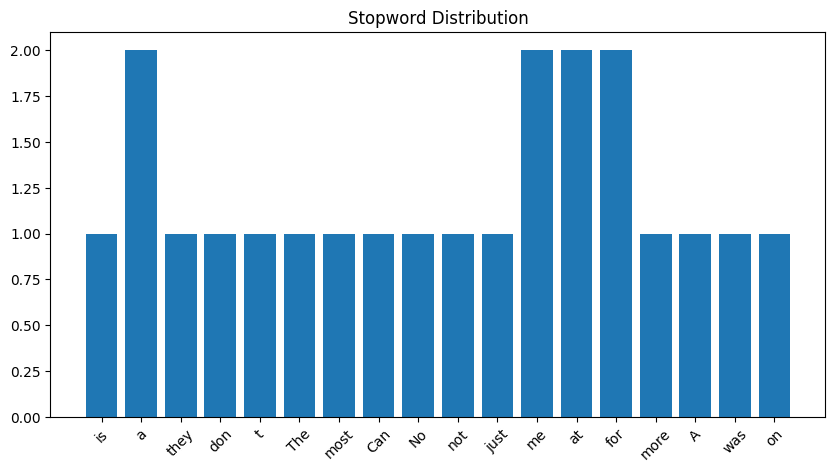

In [17]:
# Stopword Distribution
stop_words = set(stopwords.words('english'))
stopword_list = [word for word in tokens_nltk if word.lower() in stop_words]
stopword_counts = Counter(stopword_list)
plt.figure(figsize=(10, 5))
plt.bar(stopword_counts.keys(), stopword_counts.values())
plt.title("Stopword Distribution")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Remove Stopwords
filtered_text = [word for word in tokens_nltk if word.lower() not in stop_words]

In [22]:
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

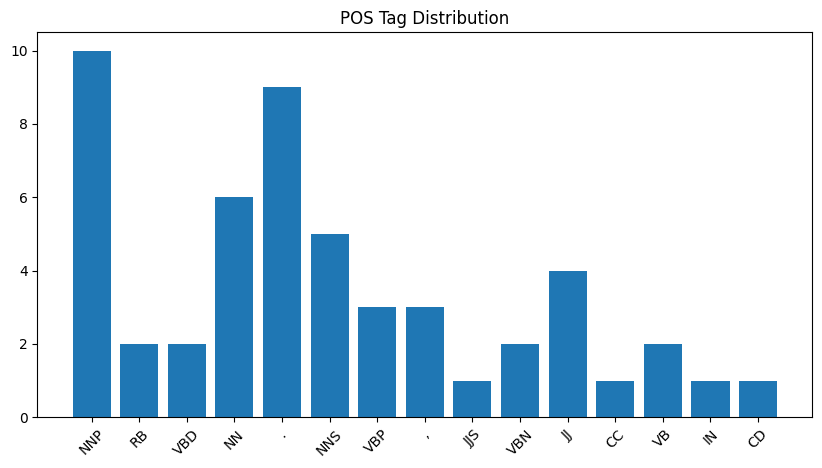

In [23]:
# POS Tagging
pos_tags = nltk.pos_tag(filtered_text)
pos_counts = Counter(tag for word, tag in pos_tags)
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Distribution")
plt.xticks(rotation=45)
plt.show()

In [24]:
# Lemmatization
doc = nlp(' '.join(filtered_text))
lemmas = set([token.lemma_ for token in doc])
print(f"Unique Lemma Count: {len(lemmas)}")


Unique Lemma Count: 49


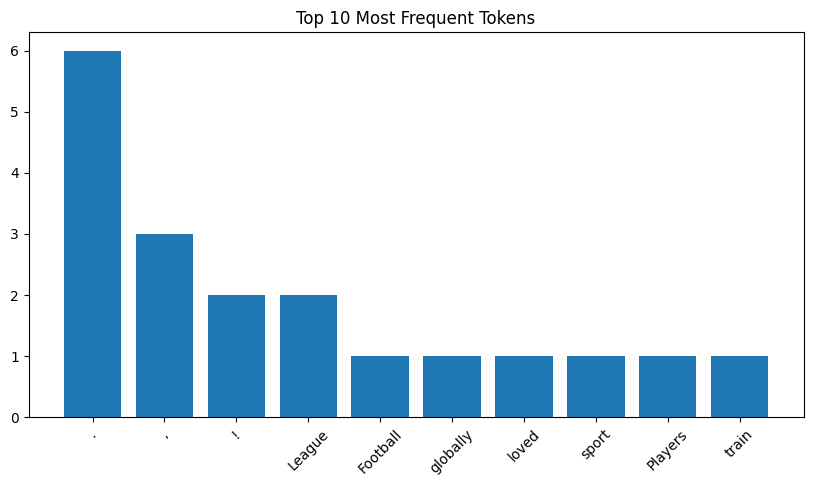

In [25]:
# Word Frequency Distribution
token_counts = Counter(filtered_text)
top_10_tokens = token_counts.most_common(10)
plt.figure(figsize=(10, 5))
plt.bar([word for word, count in top_10_tokens], [count for word, count in top_10_tokens])
plt.title("Top 10 Most Frequent Tokens")
plt.xticks(rotation=45)
plt.show()

In [26]:
# N-grams (Bigrams, Trigrams, Quadgrams)
bigrams = list(ngrams(filtered_text, 2))
trigrams = list(ngrams(filtered_text, 3))
quadgrams = list(ngrams(filtered_text, 4))
print(f"Unique Bigrams: {len(set(bigrams))}")
print(f"Unique Trigrams: {len(set(trigrams))}")
print(f"Unique Quadgrams: {len(set(quadgrams))}")

Unique Bigrams: 51
Unique Trigrams: 50
Unique Quadgrams: 49


In [27]:
# Convert Dates to DD-MM-YYYY format
date_pattern = r"\b(\d{1,2})[- ](January|February|March|April|May|June|July|August|September|October|November|December)[- ](\d{4})\b"
formatted_text = re.sub(date_pattern, lambda x: f"{x.group(1)}-{x.group(2)}-{x.group(3)}", text)
print(f"Formatted Dates: {formatted_text}")

Formatted Dates: Football is a globally loved sport! Players train hard—sometimes, they don’t even rest. The most followed club competitions include UEFA Champions League, LaLiga & Premier League. Can a team succeed without teamwork? No! Coaches emphasize strategy, not just skills. Reach me at footballfan27@gmail.com for discussions. Call me at +1-555-1234 for more. A legendary footballer was born on 27-March-2000.


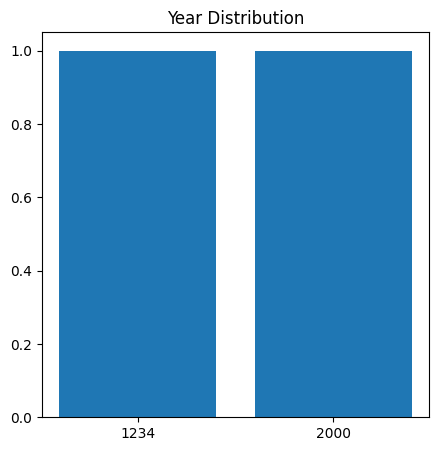

In [28]:
# Extract and Plot Years
year_pattern = r"\b(\d{4})\b"
years = re.findall(year_pattern, text)
year_counts = Counter(years)
plt.figure(figsize=(5, 5))
plt.bar(year_counts.keys(), year_counts.values())
plt.title("Year Distribution")
plt.show()

In [29]:
# Validate Phone Numbers
phone_pattern = r"\+?\d{1,3}[- ]?\d{3}[- ]?\d{4}"  # Basic phone number pattern
valid_phones = re.findall(phone_pattern, text)
print(f"Valid Phone Numbers: {valid_phones}")

Valid Phone Numbers: ['+1-555-1234']


Sentiment: Sentiment(polarity=0.75, subjectivity=0.7)


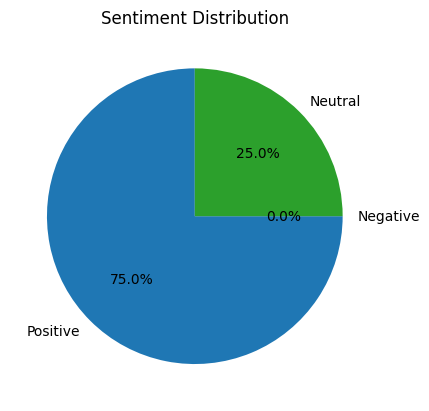

In [30]:
sentiment = TextBlob(text).sentiment
print(f"Sentiment: {sentiment}")

sentiment_polarity = sentiment.polarity
sentiment_subjectivity = sentiment.subjectivity

# Create a pie chart to visualize sentiment polarity
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_values = [sentiment_polarity if sentiment_polarity > 0 else 0,
                    -sentiment_polarity if sentiment_polarity < 0 else 0,
                    1 - abs(sentiment_polarity)]
plt.pie(sentiment_values, labels=sentiment_labels, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution")
plt.show()

Sentence: Football is a globally loved sport!
Sentiment: Positive (Score: 0.875)

Sentence: Players train hard—sometimes, they don’t even rest.
Sentiment: Neutral (Score: 0.0)

Sentence: The most followed club competitions include UEFA Champions League, LaLiga & Premier League.
Sentiment: Positive (Score: 0.5)

Sentence: Can a team succeed without teamwork?
Sentiment: Neutral (Score: 0.0)

Sentence: No!
Sentiment: Neutral (Score: 0.0)

Sentence: Coaches emphasize strategy, not just skills.
Sentiment: Neutral (Score: 0.0)

Sentence: Reach me at footballfan27@gmail.com for discussions.
Sentiment: Neutral (Score: 0.0)

Sentence: Call me at +1-555-1234 for more.
Sentiment: Positive (Score: 0.5)

Sentence: A legendary footballer was born on 27-March-2000.
Sentiment: Positive (Score: 1.0)



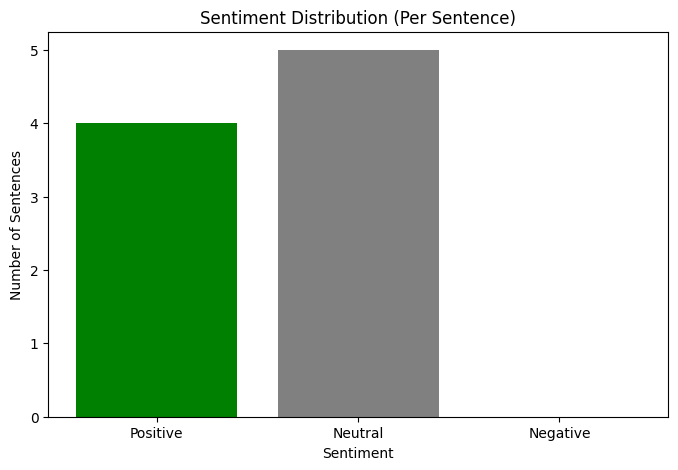

In [31]:
# Split text into sentences
sentences = sent_tokenize(text)

# Sentiment analysis of each sentence
sentiments = []
for sentence in sentences:
    blob = TextBlob(sentence)
    sentiment_score = blob.sentiment.polarity  # Get polarity score

    if sentiment_score > 0:
        sentiment = 'Positive'
    elif sentiment_score < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    sentiments.append((sentence, sentiment, sentiment_score))

# Print sentences with their sentiment classification and scores
for sentence, sentiment, score in sentiments:
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {sentiment} (Score: {score})\n")

# Count positive, neutral, and negative sentences
sentiment_counts = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
for _, sentiment, _ in sentiments:
    sentiment_counts[sentiment] += 1

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['green', 'gray', 'red'])
plt.title("Sentiment Distribution (Per Sentence)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Sentences")
plt.show()